In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

## Nombres de las Variables

* V024: Región
* V025: Tipo de lugar de residencia
* V101: Región
* V102: Tipo de lugar de residencia
* V106: Nivel educativo más alto
* V113: Fuente principal de abasteciemiento de agua potable que utilizan en su hogar para tomar o beber
* V115: Tiempo para llegar a la fuente de agua
* V136: Número de miembros del hogar
* V161: Tipo de combustible para cocinar
* V190: Índice de riqueza
* V453: Nivel de hemoglobina (g/dl - 1 decimal)
* V457: Nivel de anemia RM 363-2022-MINSA de la madre
* V457A: Nivel de Anemia NUEVA DIRECTRIZ OMS 2024/RM 251-2024-MINSA de la madre
* V466: Acceso a tratamiento médico cuando un niño enferma
* V481: Cobertura de seguro de salud
* índice_lavado_manos: ?
* S704N: Nivel educativo del esposo/compañero de la madre
* HW1: Edad en meses del niño
* HW2: Peso en kilogramos del niño
* HW3: Talla en centímetros del niño
* HW53: Nivel de hemoglobina del niño
* HW57A: Nivel de Anemia NUEVA DIRECTRIZ OMS 2024/RM 251-2024-MINSA del niño

In [ ]:
df = pd.read_csv('datos_limpios(1).csv', index_col=0)

print("Filas antes del preprocesamiento:", df.shape[0])

Filas antes del preprocesamiento: 15214


In [ ]:
df

,V024,V025,V101,V102,V106,V113,V115,V136,V161,V190,...,V457A,V466,V481,H41B,HWIDX,HW53,HW57A,HW70,S704N,indice_lavado_manos
CASEID,,,,,,,,,,,,,,,,,,,,,
325503101 2,1,1,1.0,1.0,2.0,11.0,996.0,4.0,2.0,2,...,4,1.0,1,0.0,1,143.0,4.0,-88.0,1.0,3.0
325504701 2,1,1,1.0,1.0,2.0,71.0,996.0,4.0,2.0,2,...,4,1.0,1,0.0,1,128.0,4.0,-167.0,2.0,2.0
325505001 1,1,1,1.0,1.0,1.0,11.0,996.0,3.0,2.0,2,...,4,1.0,1,0.0,1,125.0,4.0,-78.0,1.0,2.0
325508901 2,1,1,1.0,1.0,2.0,11.0,996.0,4.0,2.0,3,...,3,1.0,1,0.0,1,104.0,2.0,-27.0,2.0,2.0
325509701 2,1,1,1.0,1.0,3.0,11.0,996.0,4.0,2.0,4,...,4,1.0,1,0.0,1,121.0,4.0,-119.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705704301 1,11,1,11.0,1.0,2.0,71.0,1.0,4.0,2.0,2,...,4,1.0,1,1.0,1,134.0,4.0,-135.0,2.0,5.0
705705001 2,11,1,11.0,1.0,2.0,96.0,1.0,10.0,2.0,2,...,3,1.0,1,1.0,1,117.0,4.0,-35.0,2.0,2.0
705705001 6,11,1,11.0,1.0,3.0,96.0,1.0,10.0,2.0,2,...,4,1.0,1,1.0,1,124.0,4.0,-61.0,4.0,2.0


In [ ]:
df['TARGET'] = df['HW57A']
del df['HW57A']


df['TARGET'] = df['TARGET'].astype(int)

In [ ]:
df = df.dropna()

df.info() # Eliminamos los valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 15214 entries,       325503101  2 to       705708801  1
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   V024                 15214 non-null  int64  
 1   V025                 15214 non-null  int64  
 2   V101                 15214 non-null  float64
 3   V102                 15214 non-null  float64
 4   V106                 15214 non-null  float64
 5   V113                 15214 non-null  float64
 6   V115                 15214 non-null  float64
 7   V136                 15214 non-null  float64
 8   V161                 15214 non-null  float64
 9   V190                 15214 non-null  int64  
 10  V453                 15214 non-null  int64  
 11  V457                 15214 non-null  int64  
 12  V457A                15214 non-null  int64  
 13  V466                 15214 non-null  float64
 14  V481                 15214 non-null  int64  
 15  H41B       

# Renombramos las Variables
Las variables que empiezan con M hacen referencia a datos de la madre, las que empiezan con N a datos del niño y las que empiezan con F a datos de toda la familia.

* F01: Tipo de lugar de residencia
* F02: Fuente principal de abasteciemiento de agua potable que utilizan en su hogar para tomar o beber
* F03: Tiempo para llegar a la fuente de agua (minutos)
* F04: Número de miembros del hogar
* F05: Tipo de combustible para cocinar
* F06: Índice de riqueza
* F07: Índice de lavado de manos

* M01: Nivel educativo más alto
* M02: Nivel de Anemia de la madre (NUEVA DIRECTRIZ OMS 2024/RM 251-2024-MINSA)

* M03: Nivel educativo del esposo/compañero de la madre
* N01: Edad promedio del niño (meses)
* N02: Peso promedio del niño (kilogramos)
* N03: Talla promedio del niño (centímetros)
* TARGET: Nivel de Anemia del niño (NUEVA DIRECTRIZ OMS 2024/RM 251-2024-MINSA)


In [ ]:
#eliminamos las fijas que no vamos a usar


data = pd.DataFrame()

#eliminamos las filas que no vamos a usar

#B5:el niño está vivo
#BEDAD: meses de nacimiento
#QULT5: el niño es menor de 5 años

# Generamos el nuevo dataset ordenado

data['F01'] = df['V102']
data['F02'] = df['V113']
data['F03'] = df['V115']
data['F04'] = df['V136']
data['F05'] = df['V161']
data['F06'] = df['V190']
data['F07'] = df['indice_lavado_manos']

data['M01'] = df['V106']
data['M02'] = df['V457A']
data['M03'] = df['S704N']


data['N01'] = df['HW70']

data['TARGET'] = df['TARGET']

In [ ]:
df['TARGET'].value_counts()

,count
TARGET,
4,9357
3,3173
9,1652
2,1017
1,15


In [ ]:
#en esta parte vamos a imputar los datos faltantes, tomando en cuenta las siguientes varaiables
variables = ["F04","F06","F07","M01","M02"]  # Ejemplo

# Marcar el 9 como NaN
data["TARGET"] = data["TARGET"].replace(9, np.nan)

# Construir matriz con features + target
data_cpy = data[variables + ["TARGET"]]

# Aplicar KNN Imputer
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(data_cpy)

# Convertir de nuevo a DataFrame
df_imputed = pd.DataFrame(imputed, columns=variables + ["TARGET"])

# Redondear nivel de anemia porque es categórico
df_imputed["TARGET"] = df_imputed["TARGET"].round().astype(int)

In [ ]:
data

,F01,F02,F03,F04,F05,F06,F07,M01,M02,M03,N01,TARGET
CASEID,,,,,,,,,,,,
325503101 2,1.0,11.0,996.0,4.0,2.0,2,3.0,2.0,4,1.0,-88.0,4.0
325504701 2,1.0,71.0,996.0,4.0,2.0,2,2.0,2.0,4,2.0,-167.0,4.0
325505001 1,1.0,11.0,996.0,3.0,2.0,2,2.0,1.0,4,1.0,-78.0,4.0
325508901 2,1.0,11.0,996.0,4.0,2.0,3,2.0,2.0,3,2.0,-27.0,2.0
325509701 2,1.0,11.0,996.0,4.0,2.0,4,4.0,3.0,4,4.0,-119.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
705704301 1,1.0,71.0,1.0,4.0,2.0,2,5.0,2.0,4,2.0,-135.0,4.0
705705001 2,1.0,96.0,1.0,10.0,2.0,2,2.0,2.0,3,2.0,-35.0,4.0
705705001 6,1.0,96.0,1.0,10.0,2.0,2,2.0,3.0,4,4.0,-61.0,4.0


In [ ]:
df_imputed

,F04,F06,F07,M01,M02,TARGET
0,4.0,2.0,3.0,2.0,4.0,4
1,4.0,2.0,2.0,2.0,4.0,4
2,3.0,2.0,2.0,1.0,4.0,4
3,4.0,3.0,2.0,2.0,3.0,2
4,4.0,4.0,4.0,3.0,4.0,4
...,...,...,...,...,...,...
15209,4.0,2.0,5.0,2.0,4.0,4
15210,10.0,2.0,2.0,2.0,3.0,4
15211,10.0,2.0,2.0,3.0,4.0,4
15212,4.0,2.0,4.0,2.0,4.0,2


In [ ]:
data["TARGET"] = df_imputed["TARGET"].values

In [ ]:
data

,F01,F02,F03,F04,F05,F06,F07,M01,M02,M03,N01,TARGET
CASEID,,,,,,,,,,,,
325503101 2,1.0,11.0,996.0,4.0,2.0,2,3.0,2.0,4,1.0,-88.0,4
325504701 2,1.0,71.0,996.0,4.0,2.0,2,2.0,2.0,4,2.0,-167.0,4
325505001 1,1.0,11.0,996.0,3.0,2.0,2,2.0,1.0,4,1.0,-78.0,4
325508901 2,1.0,11.0,996.0,4.0,2.0,3,2.0,2.0,3,2.0,-27.0,2
325509701 2,1.0,11.0,996.0,4.0,2.0,4,4.0,3.0,4,4.0,-119.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
705704301 1,1.0,71.0,1.0,4.0,2.0,2,5.0,2.0,4,2.0,-135.0,4
705705001 2,1.0,96.0,1.0,10.0,2.0,2,2.0,2.0,3,2.0,-35.0,4
705705001 6,1.0,96.0,1.0,10.0,2.0,2,2.0,3.0,4,4.0,-61.0,4


In [ ]:
#ahora todo perteneces a riesgo de anemia leve o sea que no hay mucho riesgo de anemia
data["TARGET"] = data["TARGET"].replace({1:2, 2:2})

In [ ]:
data["TARGET"] =data["TARGET"]-1

In [ ]:
variables_nominales = ['F01', 'F02', 'F05']
variables_ordinales = ['F06', 'F07', 'M01', 'M02', 'M03', 'TARGET','N01']
variables_categoricas = variables_nominales + variables_ordinales

variables_numericas = ['F03', 'F04']

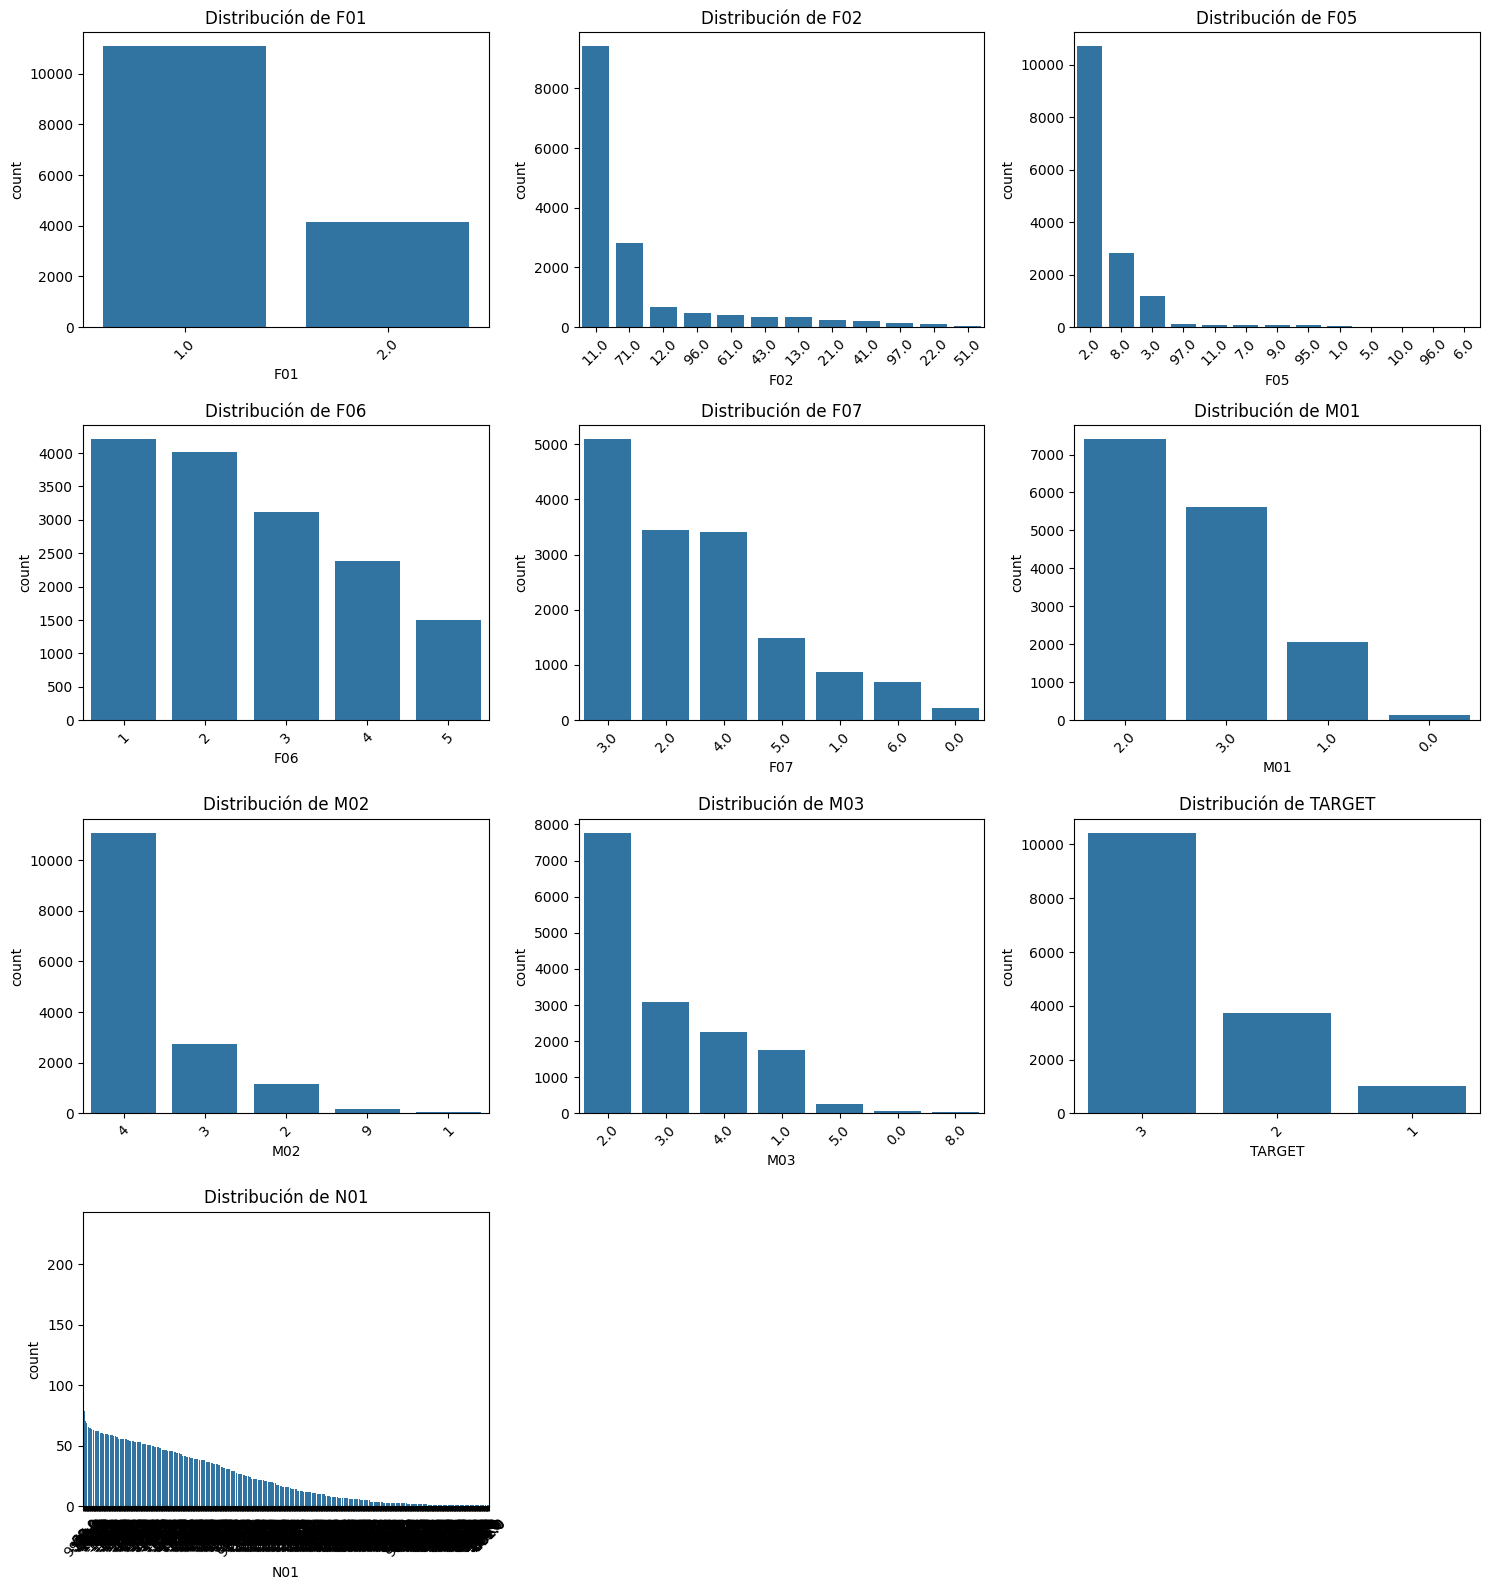

In [ ]:
# Distribución de las variables categóricas
import math

cols = 3
rows = math.ceil(len(variables_categoricas) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, var in enumerate(variables_categoricas):
    sns.countplot(data=data, x=var, order=data[var].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribución de {var}')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Para la variable F02 dejamos las categorias 11 y 71 pasando todas las
# demás a la categoría 96 (otros)
data['F02'] = np.where(data['F02'].isin([11, 71]), data['F02'], 96)


# Para la variable F05 dejamos las categorias 2 y 8 pasando todas las
# demás a la categoría 96 (otros)
data['F05'] = np.where(data['F05'].isin([2, 8]), data['F05'], 96)


# Para la variable F06, restamos 1 a su valor para que empiece en 0
# mejorando la compatibilidad con los modelos de machine learning
data['F06'] = data['F06'] - 1


# Para la variable F07, recategorizamos a Bajo (0),
# Medio (1) y Alto (2)
def recategorizar_F07(valor):
    if valor in [0, 1, 2]:
        return 0
    elif valor in [3, 4]:
        return 1
    elif valor in [5, 6]:
        return 2
    else:
        return np.nan

data['F07'] = data['F07'].apply(recategorizar_F07)


# Para la variable M02, restamos 1 a su valor para que empiece en 0
# mejorando la compatibilidad con los modelos de machine learning
data['M02'] = data['M02'] - 1


# Para la variable TARGET, restamos 1 a su valor para que empiece en 0
# mejorando la compatibilidad con los modelos de machine learning
data['TARGET'] = data['TARGET'] -1

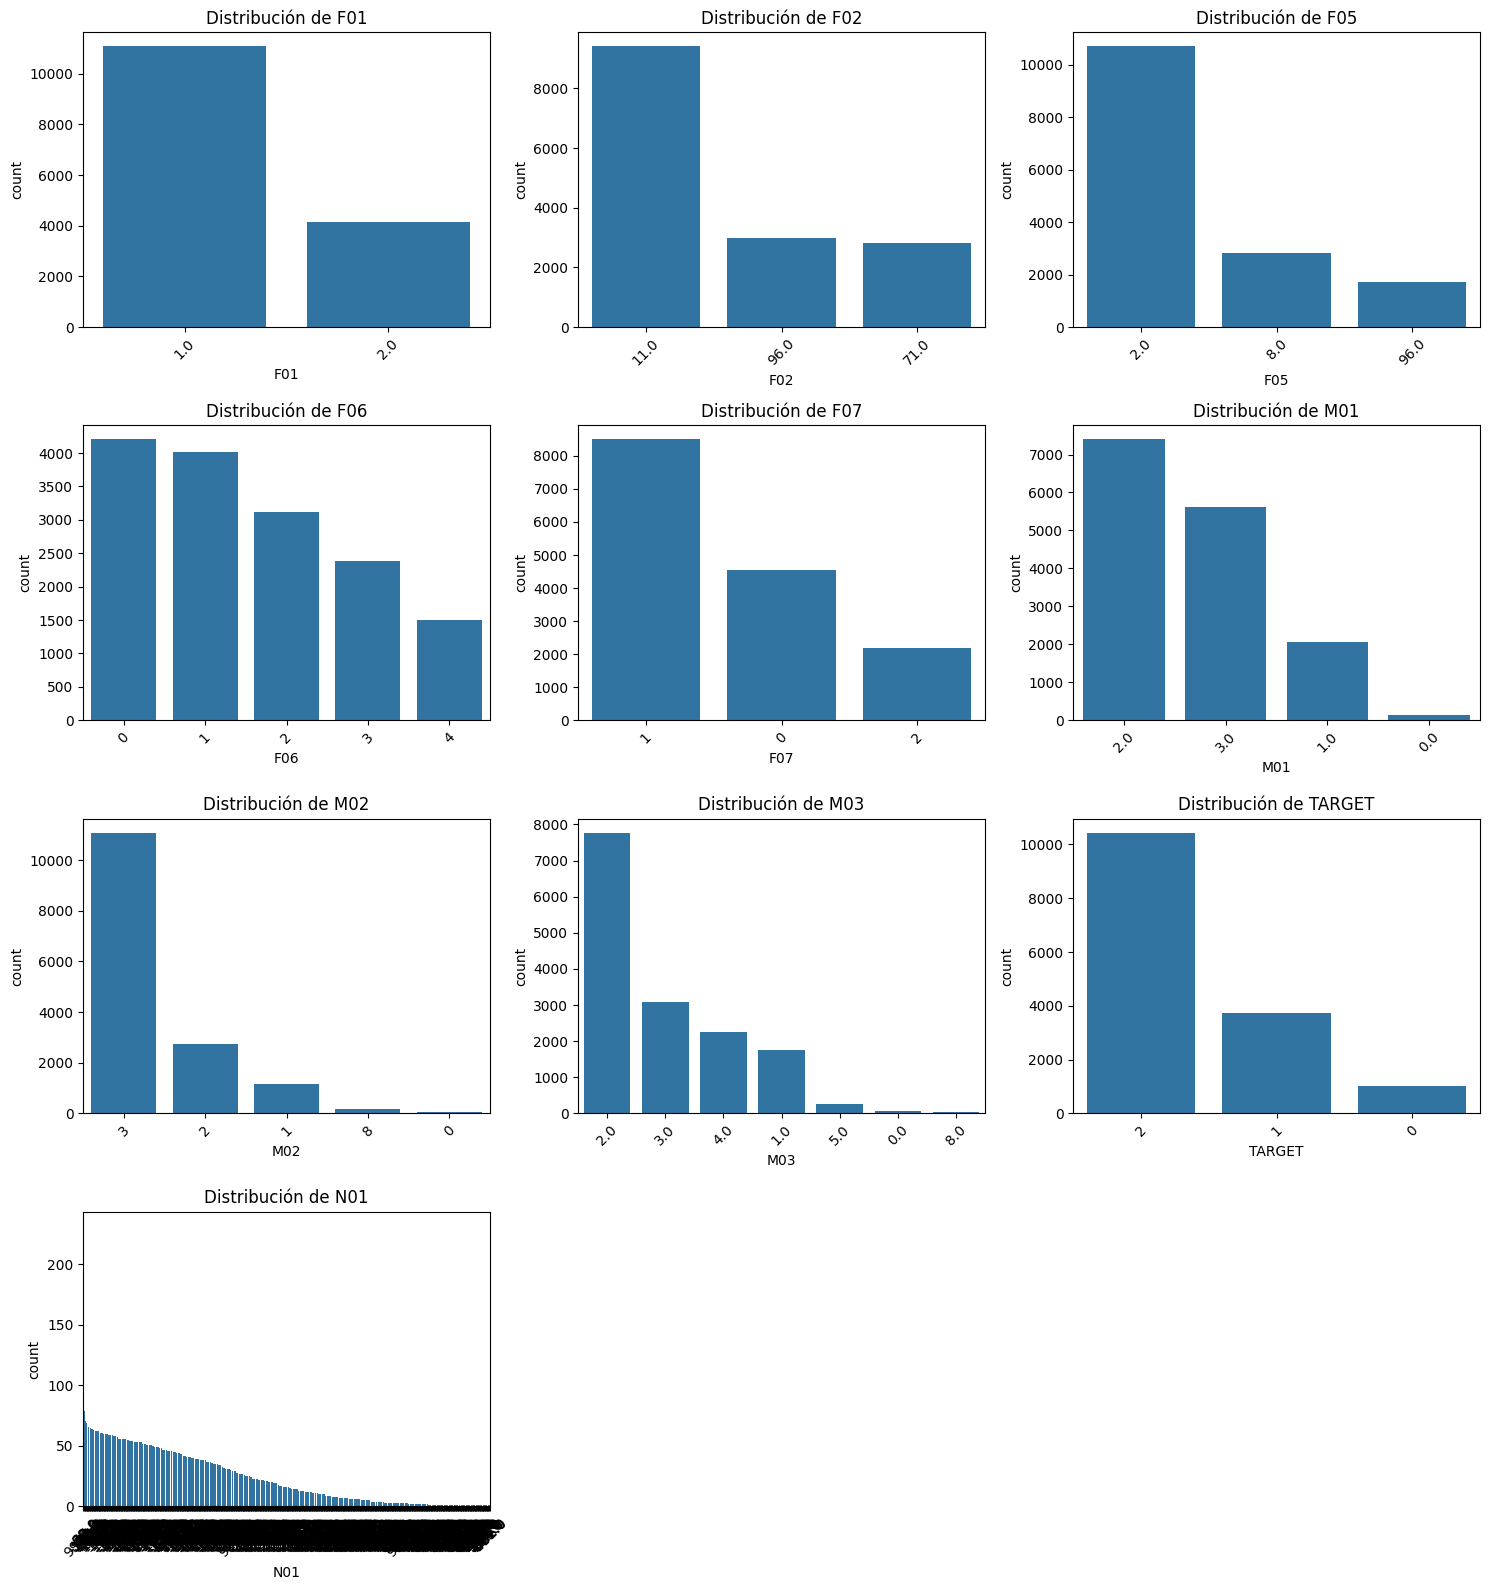

In [ ]:
# Volvemos a observar los countplots de las variables con la distribución
# corregida

cols = 3
rows = math.ceil(len(variables_categoricas) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, var in enumerate(variables_categoricas):
    sns.countplot(data=data, x=var, order=data[var].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribución de {var}')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Pasamos a One-Hot Encoding las variables categóricas nominales

data['F01_URBANO'] = np.where(data['F01'] == 1, 1, 0)
del data['F01']

data['F02_EN_VIVIENDA'] = np.where(data['F02'] == 11, 1, 0)
data['F02_AGUA_EMBOTELLADA'] = np.where(data['F02'] == 71, 1, 0)
del data['F02']

data['F05_GLP'] = np.where(data['F05'] == 2, 1, 0)
data['F05_LENHA'] = np.where(data['F05'] == 8, 1, 0)
del data['F05']

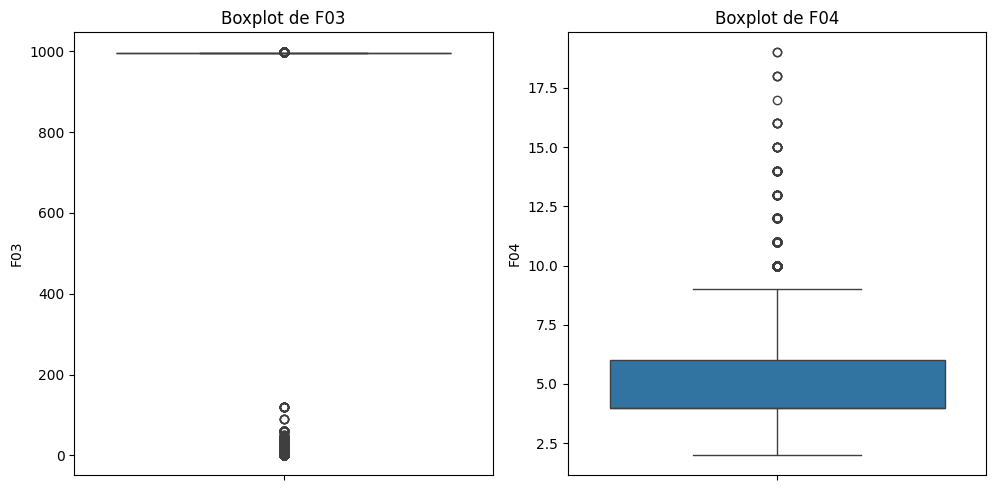

In [ ]:
# Ploteamos la distribución de las variables numéricas

n = len(variables_numericas)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

axes = axes.flatten()

for i, var in enumerate(variables_numericas):
    sns.boxplot(y=data[var], ax=axes[i])
    axes[i].set_title(f'Boxplot de {var}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Corregimos la variable F03

data['F03'] = pd.to_numeric(data['F03'], errors='coerce')

# Eliminar filas con F03 == 997 (no residente de jure)
data = data[data['F03'] != 997]

# Reemplazar F03 == 996 (agua en casa) por 0 minutos
data['F03'] = data['F03'].replace(996, 0)
data.shape

/tmp/ipython-input-958435882.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['F03'] = data['F03'].replace(996, 0)


(15077, 14)

In [ ]:
# Aplicamos winsorización para todas las demás variables numéricas

def winsorizar_columnas(dataframe, columnas):
    for col in columnas:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        dataframe[col] = np.where(dataframe[col] < lower_bound, lower_bound, dataframe[col])
        dataframe[col] = np.where(dataframe[col] > upper_bound, upper_bound, dataframe[col])

    return dataframe

variables_numericas.remove('F03')
data = winsorizar_columnas(data, variables_numericas)

/tmp/ipython-input-719342081.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col] = np.where(dataframe[col] < lower_bound, lower_bound, dataframe[col])
/tmp/ipython-input-719342081.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col] = np.where(dataframe[col] > upper_bound, upper_bound, dataframe[col])


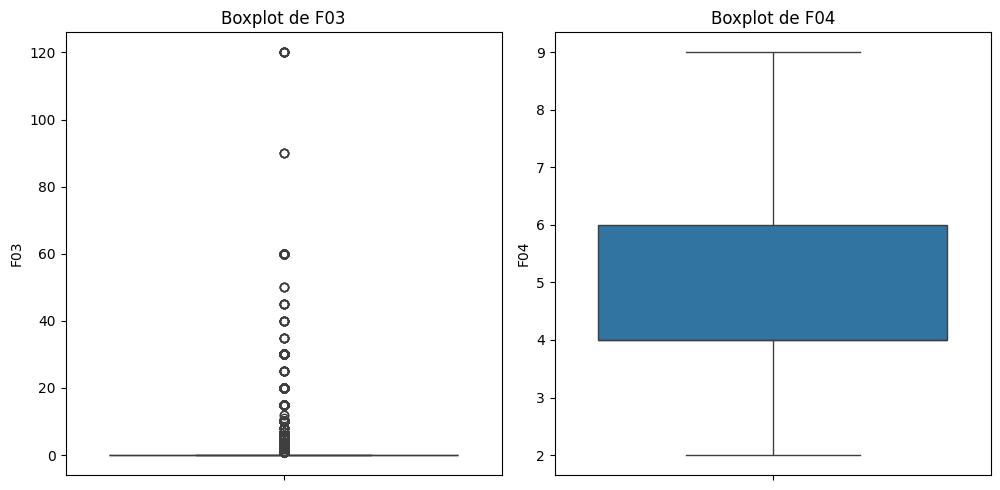

In [ ]:
# Distribución de las variables numéricas corregidas
# Se conservaron los valores atípicos de V115 porque reflejan casos reales de
# acceso limitado al agua, relevantes para la predicción de anemia. Eliminarlos
# implicaría perder información valiosa sobre poblaciones vulnerables.

variables_numericas.insert(0, 'F03')
n = len(variables_numericas)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

axes = axes.flatten()

for i, var in enumerate(variables_numericas):
    sns.boxplot(y=data[var], ax=axes[i])
    axes[i].set_title(f'Boxplot de {var}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
data['TARGET'].value_counts()

,count
TARGET,
2,10361
1,3693
0,1023


In [ ]:
# Escalamiento de las variables numéricas

from sklearn.preprocessing import MinMaxScaler

# Aplicamos MinMaxScaler a todas las variables numéricas.
# En F03, los datos no atípicos don directamente 0 (agua en la vivienda), por
# lo que los valores atípicos no distorsionan la escala. Esta transformación
# conserva el patrón  y normaliza ambas variables al rango [0, 1].dominante
scaler = MinMaxScaler()
data[variables_numericas] = scaler.fit_transform(data[variables_numericas])

/tmp/ipython-input-3734446571.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variables_numericas] = scaler.fit_transform(data[variables_numericas])


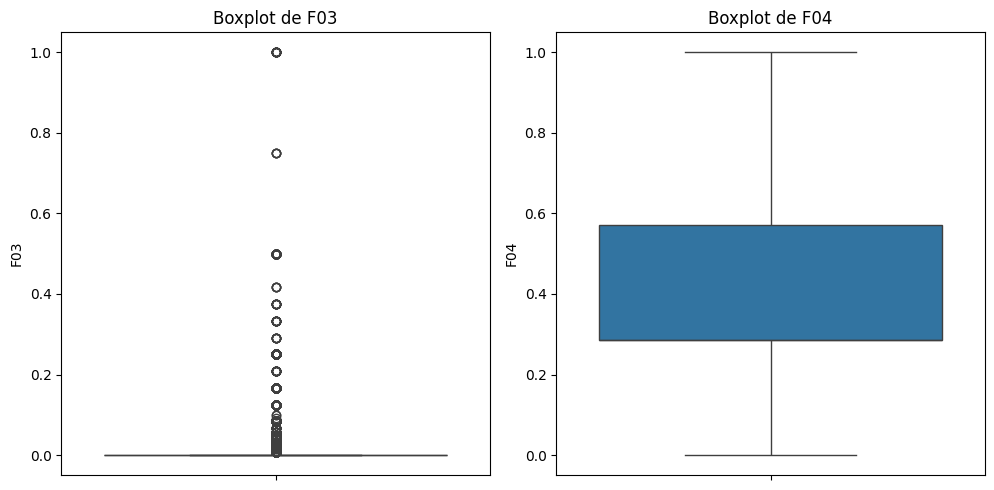

In [ ]:
# Comprobamos el escalamiento de nuestras variables numéricas

n = len(variables_numericas)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

axes = axes.flatten()

for i, var in enumerate(variables_numericas):
    sns.boxplot(y=data[var], ax=axes[i])
    axes[i].set_title(f'Boxplot de {var}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Como MinMaxScaler generó un dato atípico en la variable
# N03, eliminamos ese dato de la tabla y volvemos a escalar
# de 0 a 1.

# Quitamos los datos atípicos de N03
#Q1 = data['N03'].quantile(0.25)
#Q3 = data['N03'].quantile(0.75)
#IQR = Q3 - Q1
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
#data = data[(data['N03'] >= lower_bound) & (data['N03'] <= upper_bound)]

# Volvemos a escalar
data[variables_numericas] = scaler.fit_transform(data[variables_numericas])

/tmp/ipython-input-1747311208.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variables_numericas] = scaler.fit_transform(data[variables_numericas])


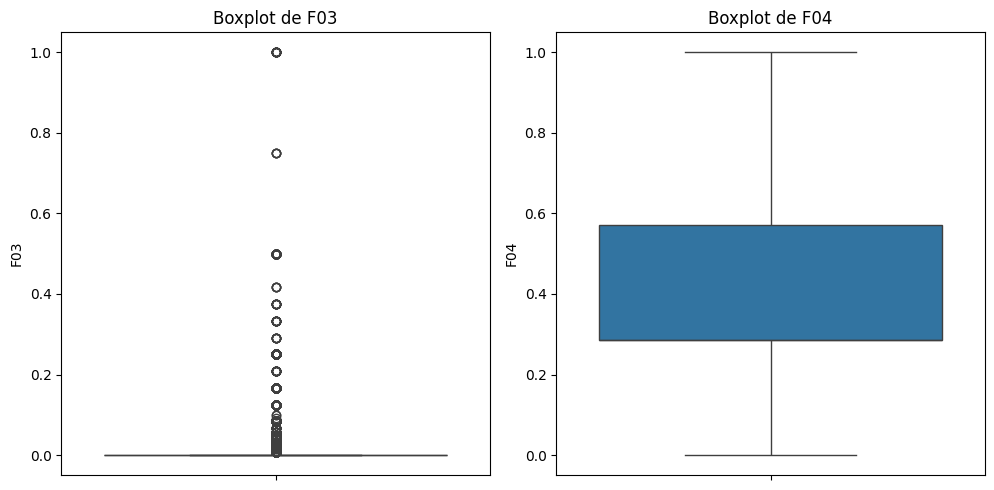

In [ ]:
# Distribución final de cajas y bigotes

n = len(variables_numericas)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

axes = axes.flatten()

for i, var in enumerate(variables_numericas):
    sns.boxplot(y=data[var], ax=axes[i])
    axes[i].set_title(f'Boxplot de {var}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
data

,F03,F04,F06,F07,M01,M02,M03,N01,TARGET,F01_URBANO,F02_EN_VIVIENDA,F02_AGUA_EMBOTELLADA,F05_GLP,F05_LENHA
CASEID,,,,,,,,,,,,,,
325503101 2,0.000000,0.285714,1,1,2.0,3,1.0,-88.0,2,1,1,0,1,0
325504701 2,0.000000,0.285714,1,0,2.0,3,2.0,-167.0,2,1,0,1,1,0
325505001 1,0.000000,0.142857,1,0,1.0,3,1.0,-78.0,2,1,1,0,1,0
325508901 2,0.000000,0.285714,2,0,2.0,2,2.0,-27.0,0,1,1,0,1,0
325509701 2,0.000000,0.285714,3,1,3.0,3,4.0,-119.0,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705704301 1,0.008333,0.285714,1,2,2.0,3,2.0,-135.0,2,1,0,1,1,0
705705001 2,0.008333,1.000000,1,0,2.0,2,2.0,-35.0,2,1,0,0,1,0
705705001 6,0.008333,1.000000,1,0,3.0,3,4.0,-61.0,2,1,0,0,1,0


In [ ]:
# Casteamos todo el dtaframe a float para regularidad de datos
data = data.astype(float)
#clasificamos según OMS
data['N01'] = data['N01'].replace([9996, 9997, 9998], np.nan)
data.dropna(axis=0)
# Imprimimos el número total de filas luego del preprocesamiento
print("Filas después del preprocesamiento:", data.shape[0])

Filas después del preprocesamiento: 15077


In [ ]:
# Exportar csv preprocesado

data.to_csv('dataset_preprocesado.csv', index=False)

In [ ]:
data

,F03,F04,F06,F07,M01,M02,M03,N01,TARGET,F01_URBANO,F02_EN_VIVIENDA,F02_AGUA_EMBOTELLADA,F05_GLP,F05_LENHA
CASEID,,,,,,,,,,,,,,
325503101 2,0.000000,0.285714,1.0,1.0,2.0,3.0,1.0,-88.0,2.0,1.0,1.0,0.0,1.0,0.0
325504701 2,0.000000,0.285714,1.0,0.0,2.0,3.0,2.0,-167.0,2.0,1.0,0.0,1.0,1.0,0.0
325505001 1,0.000000,0.142857,1.0,0.0,1.0,3.0,1.0,-78.0,2.0,1.0,1.0,0.0,1.0,0.0
325508901 2,0.000000,0.285714,2.0,0.0,2.0,2.0,2.0,-27.0,0.0,1.0,1.0,0.0,1.0,0.0
325509701 2,0.000000,0.285714,3.0,1.0,3.0,3.0,4.0,-119.0,2.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705704301 1,0.008333,0.285714,1.0,2.0,2.0,3.0,2.0,-135.0,2.0,1.0,0.0,1.0,1.0,0.0
705705001 2,0.008333,1.000000,1.0,0.0,2.0,2.0,2.0,-35.0,2.0,1.0,0.0,0.0,1.0,0.0
705705001 6,0.008333,1.000000,1.0,0.0,3.0,3.0,4.0,-61.0,2.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
F03,15077.0,0.014882,0.064243,0.0,0.000000,0.000000,0.000000,1.0
F04,15077.0,0.399303,0.226314,0.0,0.285714,0.285714,0.571429,1.0
F06,15077.0,1.540890,1.305540,0.0,0.000000,1.000000,3.000000,4.0
F07,15077.0,0.844266,0.646456,0.0,0.000000,1.000000,1.000000,2.0
M01,15077.0,2.215759,0.702926,0.0,2.000000,2.000000,3.000000,3.0
M02,15077.0,2.721297,0.856549,0.0,2.000000,3.000000,3.000000,8.0
M03,15077.0,2.441865,0.984299,0.0,2.000000,2.000000,3.000000,8.0
N01,15047.0,71.703197,1238.323384,-582.0,-148.000000,-79.000000,-9.000000,9999.0
TARGET,15077.0,1.619354,0.609494,0.0,1.000000,2.000000,2.000000,2.0
F01_URBANO,15077.0,0.730318,0.443809,0.0,0.000000,1.000000,1.000000,1.0


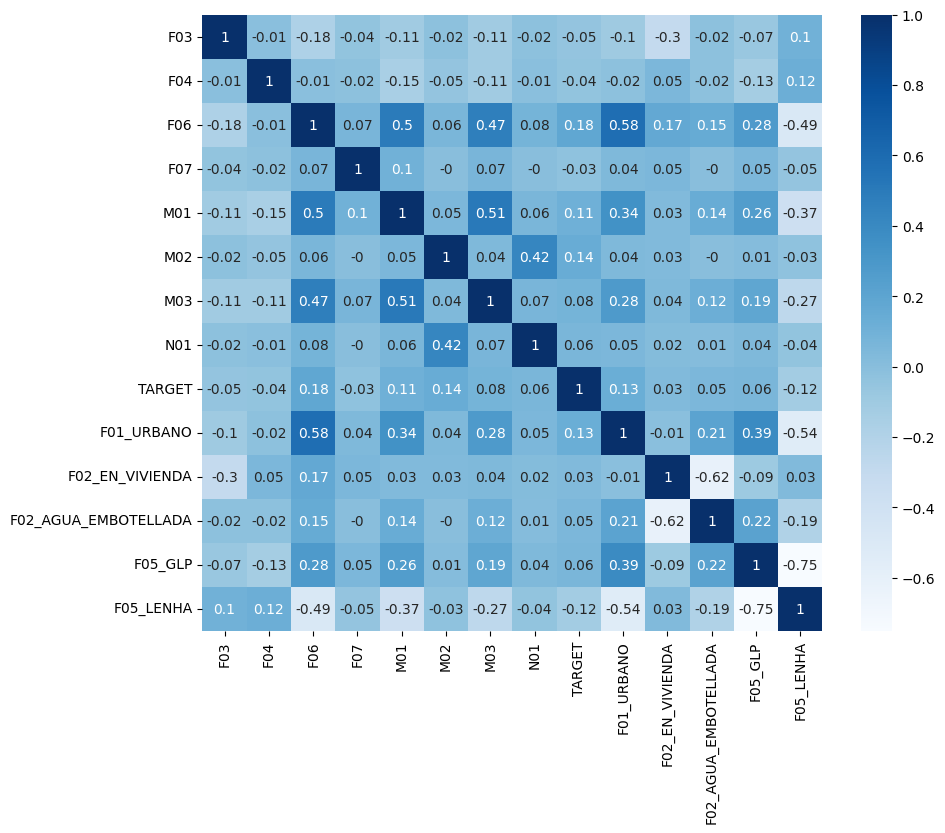

In [ ]:
data_C = data.corr(numeric_only=True).apply(lambda x: round(x,2))
plt.figure(figsize=(10,8))
sns.heatmap(data_C,
            annot=True,
            cmap='Blues')
plt.show()

In [ ]:
data['TARGET'].value_counts()

,count
TARGET,
2.0,10361
1.0,3693
0.0,1023


Regresión logística